### Import data from Kaggle (Kaggle API)

[**`medium-articles`** data from Kaggle](https://www.kaggle.com/datasets/fabiochiusano/medium-articles)

```bash
kaggle datasets download -d fabiochiusano/medium-articles
unzip medium-articles.zip
```

In [1]:
from datetime import datetime
import pandas as pd

def clean_data(df):
    # Filter rows based on column: 'tags'
    df = df[df['tags'].str.contains("technology", na=False, case=False)]
    # Derive column 'derivedCol' from column: 'timestamp'
    # Transform "timestamp" as per the following examples:
    #   2020-10-10 20:17:37.132000+00:00 ==> 2020-10-10
    df.insert(5, "derivedCol", df["timestamp"].str.split(" ").str[0])
    # Change column type to datetime64[ns] for column: 'derivedCol'
    df = df.astype({'derivedCol': 'datetime64[ns]'}, copy=False)
    # Filter rows based on column: 'derivedCol'
    df = df[df['derivedCol'] > datetime.strptime('2021-04-26T20:56:17.582Z', '%Y-%m-%dT%H:%M:%S.%fZ')]
    # Drop columns: 'title', 'url' and 4 other columns
    df.drop(columns=['title', 'url', 'authors', 'timestamp', 'derivedCol', 'tags'], inplace=True)
    # Drop duplicate rows across all columns
    df.drop_duplicates(inplace=True)
    # Calculated text length from column: 'text'
    df.insert(1, 'text_len', df['text'].str.len())
    return df

# Loaded variable 'df' from URI: /workspaces/text-crafter/medium_articles.csv
df = pd.read_csv(r"C:\Users\Store\CODE\AIML\0DataSets\medium_articles\medium_articles.csv")

df_clean = clean_data(df.copy())
df_clean.head()

,text,text_len
135143,⭐A Target Package is short for Target Package ...,9176
135145,‘WATCH’ ~ New Series HDTV! ~ The Good Fight Se...,11175
135146,⭐A Target Package is short for Target Package ...,9175
135152,⭐A Target Package is short for Target Package ...,9195
135153,⭐A Target Package is short for Target Package ...,9212


In [7]:
df_clean.to_csv(r"C:\Users\Store\CODE\AIML\0DataSets\medium_articles\medium-articles-technology.csv", index=False, encoding='utf-8')

### Load and explore data

In [9]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Store\CODE\AIML\0DataSets\medium_articles\medium-articles-technology.csv', encoding='utf-8')
df.head()

,Unnamed: 0,text,text_len
0,135143,⭐A Target Package is short for Target Package ...,9176
1,135145,‘WATCH’ ~ New Series HDTV! ~ The Good Fight Se...,11175
2,135146,⭐A Target Package is short for Target Package ...,9175
3,135152,⭐A Target Package is short for Target Package ...,9195
4,135153,⭐A Target Package is short for Target Package ...,9212


### Visualize data

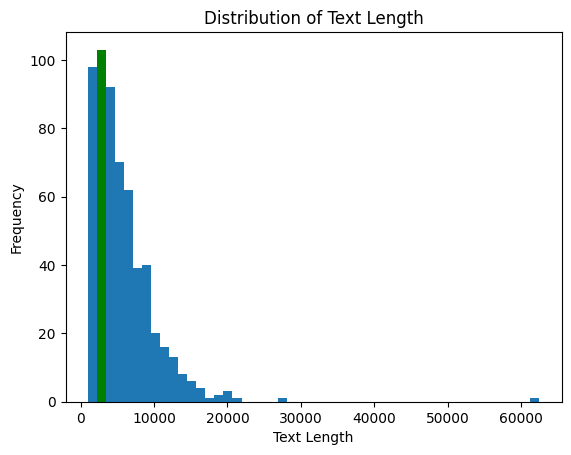

In [10]:
# Create a distribution chart with df_clean's text_len column
import matplotlib.pyplot as plt

# Get the histogram data
n, bins, patches = plt.hist(df['text_len'], bins=50)

# Find the tallest and shortest bars
tallest_patch = patches[0]
shortest_patch = patches[0]
for patch in patches:
    if patch.get_height() > tallest_patch.get_height():
        tallest_patch = patch
    if patch.get_height() < shortest_patch.get_height():
        shortest_patch = patch

# Color the tallest bar green and shortest bar red
tallest_patch.set_fc('g')
shortest_patch.set_fc('r')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()



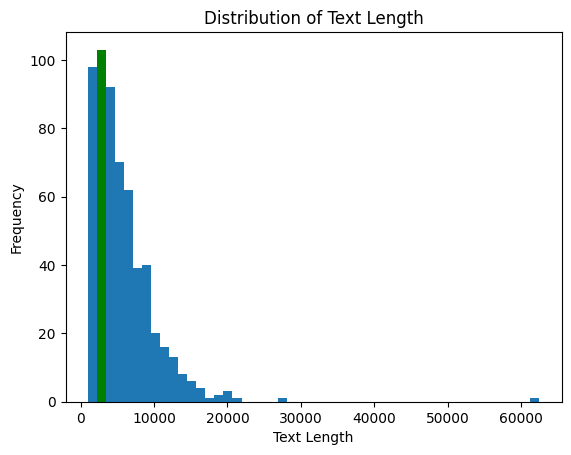

In [11]:
# Create the same plot, but color the tallest bar as green and shortest bar as red

import matplotlib.pyplot as plt

# Create histogram with 50 bins
n, bins, patches = plt.hist(df['text_len'], bins=50)

# Find the tallest and shortest bars
tallest_patch = patches[0]
shortest_patch = patches[0]
for patch in patches:
    if patch.get_height() > tallest_patch.get_height():
        tallest_patch = patch
    if patch.get_height() < shortest_patch.get_height():
        shortest_patch = patch

# Set the color of the tallest and shortest bars
tallest_patch.set_fc('g')
shortest_patch.set_fc('r')

# Set the labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')

# Show the plot
plt.show()

In [ ]:
# TODO: Create visualization with df's text and text_len columns

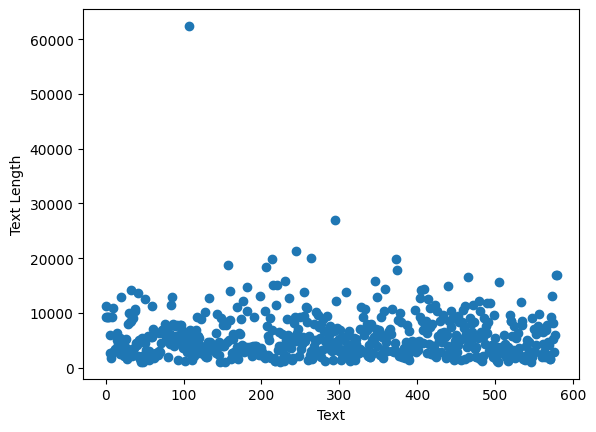

In [12]:
# Create visualization with df's text and text_len columns

import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df.index, df['text_len'])

# Set axis labels
plt.xlabel('Text')
plt.ylabel('Text Length')

# Show plot
plt.show()


In [ ]:
# TODO: Generate word cloud using df's text column

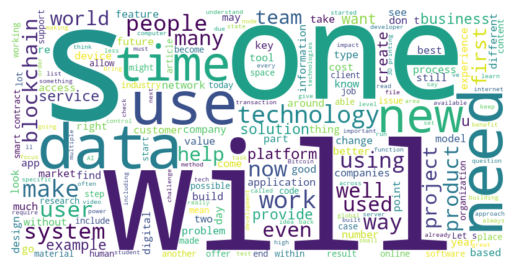

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# assuming your dataframe is named 'df' and the text column is named 'text'
text = " ".join(review for review in df.text)

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


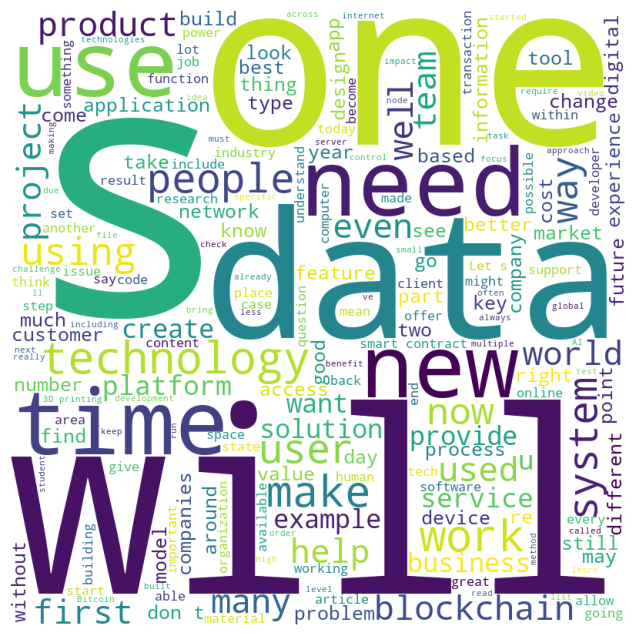

In [14]:
# Generate word cloud using df's text column
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['text']))

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# TODO: Create an ipywidget with a button that when pressed, outputs a random row from df's text column

In [15]:
# Create an ipywidget with a button that when pressed, outputs a random row from df's text column

import ipywidgets as widgets
from IPython.display import display
import random

# Assuming you have a pandas dataframe named df with a column named 'text'
def on_button_clicked(b):
    random_row = df.sample()
    print(random_row['text'].values[0])

button = widgets.Button(description="Get Random Row")
display(button)

button.on_click(on_button_clicked)


Button(description='Get Random Row', style=ButtonStyle())

The end of the year has been a very remarkable period for Gear. We finally announced that we had raised $12 million in a private investment round led by Blockchange Ventures. In addition to Blockchange, other top venture capital funds who participated in this round include: Three Arrows Capital, Lemniscap, Distributed Global, LAO, Mechanism Capital, Bitscale, Spartan Group LLC, HashKey, DI Ventures, Elysium Venture Capital, Signum Capital, and P2P Economy lead by Konstantin Lomashuk, along with several top executives of Web3 Foundation and Parity Technologies, including its founder Gavin Wood.

Other important milestones reached in December were mainly technical improvements to the Gear platform. The changes are as follows:

We added a program_id() function to gstd, which returns the program’s identifier. It can be used where the program wants to store funds, like fungible-tokens for itself.

New message processing logic with core-processor has been implemented.

This migrates current 

### More

Unrelated but another visualization for fun...

TODO: Write mermaid code showing the structure of the current directory

<!-- Write mermaid code showing the structure of the current directory -->
```mermaid
graph TD;
    A["c:\\"] --> B["Users"];
    A --> C["Program Files"];
    A --> D["Windows"];
    B --> E["somin"];
    B --> F["Public"];
    E --> G["Downloads"];
    E --> H["Documents"];
    G --> I["vscday"];
    H --> J["work"];
```
